In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
df = pd.read_csv("/kaggle/input/nepal-earthquake-seismicity-dataset-1990-2026/nepal_earthquakes_1990_2026.csv")

In [22]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-12-07T02:43:07.342Z,29.8698,80.9384,43.404,4.4,mb,21.0,166.0,8.856,0.94,...,2025-12-26T01:20:25.040Z,"37 km E of Dārchulā, Nepal",earthquake,13.18,9.350,0.144,14.0,reviewed,us,us
1,2025-12-04T11:59:01.015Z,29.1109,87.0043,10.000,4.1,mb,36.0,168.0,3.646,1.26,...,2025-12-27T14:38:45.040Z,"130 km N of Lobuche, Nepal",earthquake,10.55,1.930,0.103,26.0,reviewed,us,us
2,2025-11-10T22:44:15.027Z,29.1757,86.8367,10.000,4.2,mb,14.0,164.0,3.779,0.57,...,2025-12-01T01:43:29.040Z,"136 km N of Lobuche, Nepal",earthquake,12.27,1.963,0.199,7.0,reviewed,us,us
3,2025-11-03T20:57:22.312Z,28.5267,87.3673,10.000,4.7,mb,64.0,79.0,3.493,0.77,...,2025-11-23T19:51:34.188Z,"84 km NE of Lobuche, Nepal",earthquake,9.64,1.872,0.058,89.0,reviewed,us,us
4,2025-10-21T14:59:40.611Z,29.0245,85.3683,10.000,4.1,mb,25.0,163.0,5.072,0.44,...,2025-11-13T19:11:33.040Z,"35 km SSE of Saga, China",earthquake,9.46,1.840,0.103,26.0,reviewed,us,us


In [23]:
df.shape

(1536, 22)

In [24]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,1536.000000,1536.000000,1536.000000,1536.000000,725.000000,1167.000000,733.000000,1532.000000,717.000000,954.000000,726.000000,1460.000000
mean,29.032246,85.235347,21.747895,4.372826,47.016552,113.657241,2.533517,0.908427,7.908466,5.333807,0.106114,29.119863
std,1.163598,2.360856,16.395891,0.481884,54.248199,48.599046,2.155458,0.276937,2.303690,6.764082,0.050213,40.450971
min,26.001800,80.008000,2.000000,3.000000,5.000000,10.000000,0.027000,0.060000,2.400000,0.000000,0.033000,1.000000
25%,27.905275,83.432750,10.000000,4.100000,16.000000,77.000000,0.805000,0.710000,6.300000,1.888750,0.072000,4.000000
50%,28.907400,85.810700,10.000000,4.300000,28.000000,110.000000,1.995000,0.900000,7.700000,1.900000,0.095000,14.000000
75%,30.106000,87.353350,33.000000,4.600000,56.000000,152.000000,3.621000,1.100000,9.370000,6.000000,0.130000,36.000000
max,30.996000,88.999000,143.200000,7.800000,468.000000,290.500000,22.604000,1.890000,17.600000,53.700000,0.521000,328.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1536 entries, 0 to 1535
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             1536 non-null   object 
 1   latitude         1536 non-null   float64
 2   longitude        1536 non-null   float64
 3   depth            1536 non-null   float64
 4   mag              1536 non-null   float64
 5   magType          1536 non-null   object 
 6   nst              725 non-null    float64
 7   gap              1167 non-null   float64
 8   dmin             733 non-null    float64
 9   rms              1532 non-null   float64
 10  net              1536 non-null   object 
 11  id               1536 non-null   object 
 12  updated          1536 non-null   object 
 13  place            1536 non-null   object 
 14  type             1536 non-null   object 
 15  horizontalError  717 non-null    float64
 16  depthError       954 non-null    float64
 17  magError      

In [26]:
df.isnull().mean()

time               0.000000
latitude           0.000000
longitude          0.000000
depth              0.000000
mag                0.000000
magType            0.000000
nst                0.527995
gap                0.240234
dmin               0.522786
rms                0.002604
net                0.000000
id                 0.000000
updated            0.000000
place              0.000000
type               0.000000
horizontalError    0.533203
depthError         0.378906
magError           0.527344
magNst             0.049479
status             0.000000
locationSource     0.000000
magSource          0.000000
dtype: float64

In [27]:
df = df[['latitude','longitude','depth','mag','time']]
df.dropna(inplace = True)

In [29]:
# Convert time column
df['time'] = pd.to_datetime(df['time'], errors='coerce')
df.dropna(inplace=True)

In [31]:
# Extract temporal features
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

In [33]:
# Ensure numeric values
for col in ['latitude', 'longitude', 'depth', 'mag']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(inplace=True)

df.head()

,latitude,longitude,depth,mag,time,year,month
0,29.8698,80.9384,43.404,4.4,2025-12-07 02:43:07.342000+00:00,2025,12
1,29.1109,87.0043,10.000,4.1,2025-12-04 11:59:01.015000+00:00,2025,12
2,29.1757,86.8367,10.000,4.2,2025-11-10 22:44:15.027000+00:00,2025,11
3,28.5267,87.3673,10.000,4.7,2025-11-03 20:57:22.312000+00:00,2025,11
4,29.0245,85.3683,10.000,4.1,2025-10-21 14:59:40.611000+00:00,2025,10


In [34]:
#EDA

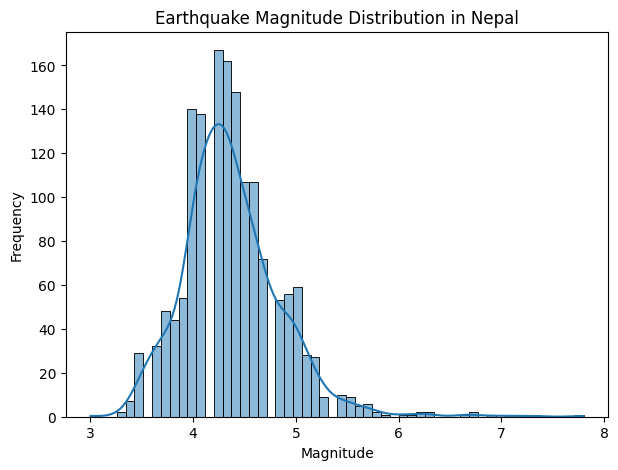

In [40]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='mag', kde=True)
plt.title("Earthquake Magnitude Distribution in Nepal")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()


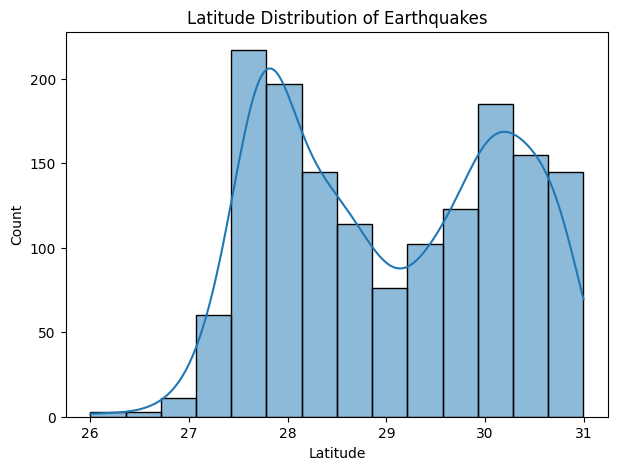

In [46]:
plt.figure(figsize=(7,5))
sns.histplot(data=df, x='latitude', kde=True)
plt.title("Latitude Distribution of Earthquakes")
plt.xlabel("Latitude")
plt.show()


In [48]:
X = df[['latitude', 'longitude', 'depth', 'year', 'month']]
y = df['mag']

print(X.dtypes)


latitude     float64
longitude    float64
depth        float64
year           int32
month          int32
dtype: object


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
X_train

,latitude,longitude,depth,year,month
845,30.1080,83.4410,17.20,2008,11
1346,27.7330,86.4980,33.00,1997,10
81,28.5993,87.2148,10.00,2025,1
1438,28.0080,87.2300,33.00,1996,2
374,28.3381,87.8381,55.92,2016,4
...,...,...,...,...,...
1130,29.8780,87.9150,35.00,2004,7
1294,30.2990,88.1120,33.00,1998,8
860,27.4700,87.8430,3.30,2008,10
1459,30.0020,88.1810,38.80,1995,4


In [51]:
y_train

845     3.9
1346    4.3
81      4.6
1438    4.1
374     4.3
       ... 
1130    4.2
1294    4.6
860     3.8
1459    4.1
1126    4.9
Name: mag, Length: 1228, dtype: float64

In [52]:
model = RandomForestRegressor( n_estimators=200,random_state=42)

model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [53]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 0.47987626347502693
R² Score: 0.08807736918563314


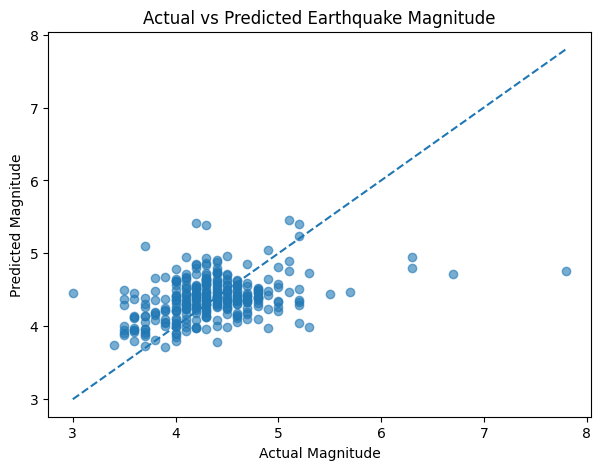

In [54]:
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')
plt.xlabel("Actual Magnitude")
plt.ylabel("Predicted Magnitude")
plt.title("Actual vs Predicted Earthquake Magnitude")
plt.show()


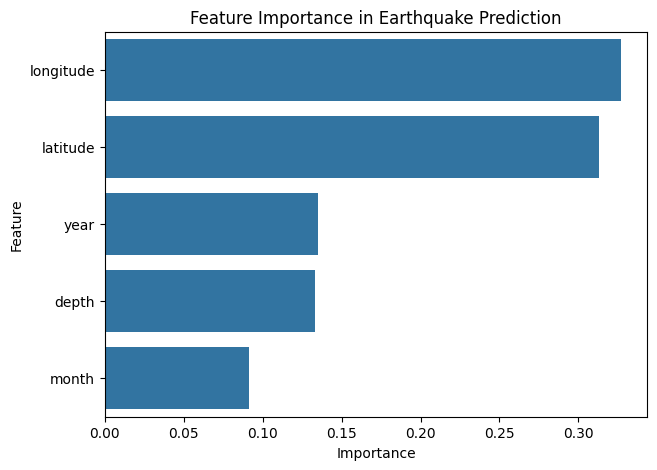

In [55]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(data=feature_importance, x='Importance', y='Feature')
plt.title("Feature Importance in Earthquake Prediction")
plt.show()


In [56]:
print("Model Type: Supervised Machine Learning")
print("Algorithm: Random Forest Regression")
print("Prediction Target: Earthquake Magnitude")


Model Type: Supervised Machine Learning
Algorithm: Random Forest Regression
Prediction Target: Earthquake Magnitude
